100%|██████████| 70/70 [00:43<00:00,  1.60it/s]


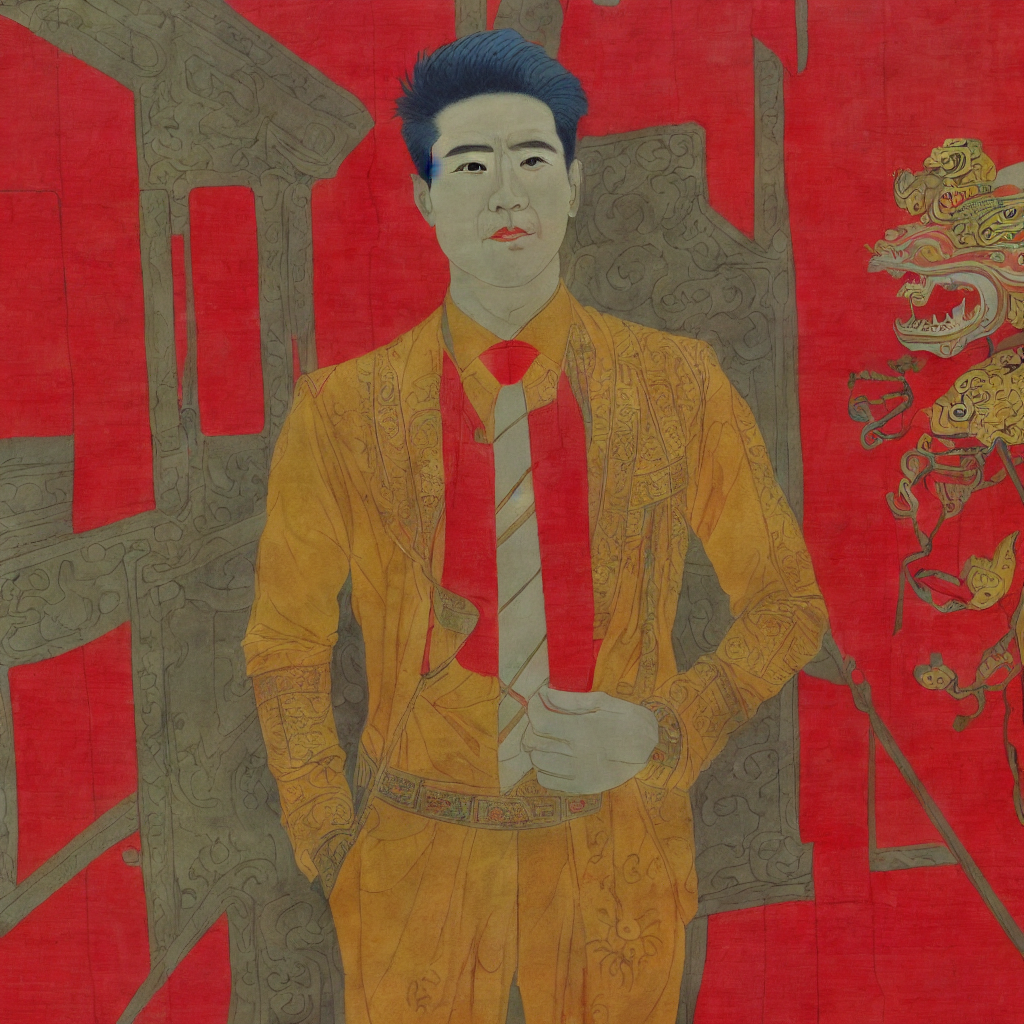

In [3]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from transformers import CLIPTextModel, CLIPTokenizer
import torch
import cv2
from PIL import Image
import numpy as np

# 加载 ControlNet 和 Stable Diffusion
controlnet = ControlNetModel.from_pretrained("../autodl-tmp/models--lllyasviel--control_v11p_sd15_canny/snapshots/115a470d547982438f70198e353a921996e2e819")
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "../autodl-tmp/runwayml--stable-diffusion/snapshots/f03de327dd89b501a01da37fc5240cf4fdba85a1", controlnet=controlnet
)
pipe.to("cuda")  # 使用GPU加速

# 加载并预处理输入图像
input_image = cv2.imread("0_3.png")
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=200)
edges_image = Image.fromarray(edges)

# 生成年画风格的图像
prompt = "a traditional Chinese New Year painting style of a warrior figure, vibrant colors, detailed lines"
generated_image = pipe(prompt, image=edges_image, num_inference_steps=70).images[0]

# 保存生成结果
generated_image.save("output_nianhua_style.jpg")
generated_image.show()
